In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

In [3]:
def I_gap(i, big_V, big_G_gap):
    sum = 0
    for j in range(len(big_V)):
        sum += big_G_gap[i, j] * (big_V[i] - big_V[j])

    return sum

def I_syn(i, big_V, big_E, big_s, big_G_syn):
    sum = 0
    for j in range(len(big_V)):
        sum += big_G_syn[i, j] * big_s[j] * (big_V[i] - big_E[j])
    return sum

In [4]:
def delta_s(V_m, s_i):
    a_r = 1
    a_d = 5
    beta = 0.125
    V_th = 0 #??

    sig = 1 / (1 + np.exp(-beta * (V_m - V_th)))

    return a_r * sig * (1 - s_i) - a_d * s_i

In [5]:
def I_leak(V_m):
    E_leak = -35 #mV
    G_leak = 10 #pS I think

    return G_leak * (V_m - E_leak)

In [6]:
def delta_V_m(V_m, I_leak, I_gap, I_syn, I_in):
    C_m = 1 #pF

    current_sum = -I_leak - I_gap - I_syn + I_in
    return current_sum / C_m

In [7]:
np.array([[0.0, 100.0], [100.0, 0.0]])

array([[  0., 100.],
       [100.,   0.]])

In [35]:
def start_sim(time_step, run_time, input_amount=50, in_start=0.4, in_end=0.6):
    input_current = np.array([0, 0])
    
    # Set inital values
    big_V = np.array([-120.0, 0.0])
    big_G_gap = np.array([[0.0, 0.0],[0.0,0.0]])
    big_G_syn = np.array([[0.0, 100.0], [100.0, 0.0]])
    big_E = np.array([0.0, 0.0])
    big_s = np.array([0.5, 0.5])
    indices = np.array([0, 1])
    
    t = 0

    # Storage
    big_V_array = []
    
    I_leak_array = []
    I_in_array = []
    I_syn_array = []
    time = []

    time_range = int(run_time / time_step)
    start_index = int(time_range * in_start)
    end_index = int(time_range * in_end)

    for i in range(time_range):
        if i == time_range // 4:
            print("25%")
        if i == time_range // 2:
            print("50%")
        if i == (time_range // 4) * 3:
            print("75%")

        if i == start_index:
            input_current[0] = input_amount
        
        if i == end_index:
            input_current[0] = 0

        # Time stuff
        time.append(t)
        t += time_step

        # Calculate
        leak_current = I_leak(big_V)
        
        gap_current = I_gap(indices, big_V, big_G_gap)
        syn_current = I_syn(indices, big_V, big_E, big_s, big_G_syn)
        
        d_V_m = delta_V_m(big_V, leak_current, gap_current, syn_current, input_current)
        d_s = delta_s(big_V, big_s)

        #TEMP Voltage clamp
        d_V_m[0] = 0
        
        #Update
        big_V += d_V_m * time_step
        big_s += d_s * time_step
    
        #Store
        big_V_array.append(big_V.copy())
        I_leak_array.append(leak_current.copy())
        I_in_array.append(input_current.copy())
        I_syn_array.append(syn_current.copy())

    return [time, np.array(big_V_array) ,np.array(I_leak_array), np.array(I_in_array), np.array(I_syn_array)]

In [36]:
def show_data(res, start=0, end=-1):
    plt.plot(res[0][start:end], res[1][start:end], label='V_m')
    plt.legend(loc='best')
    plt.show()
    plt.plot(res[0][start:end],res[2][start:end], label='I_leak')
    plt.plot(res[0][start:end],res[3][start:end], label='I_in')
    plt.plot(res[0][start:end],res[4][start:end], label='I_syn')
    plt.legend(loc='best')
    plt.show()
    # Current by voltage
    plt.scatter(res[1][start:end:300],res[2][start:end:300], label='I_leak')
    plt.legend(loc='best')
    plt.show()

In [37]:
results = start_sim(0.0001, 3.0, in_start=1.2, in_end=1.2)

25%
50%
75%


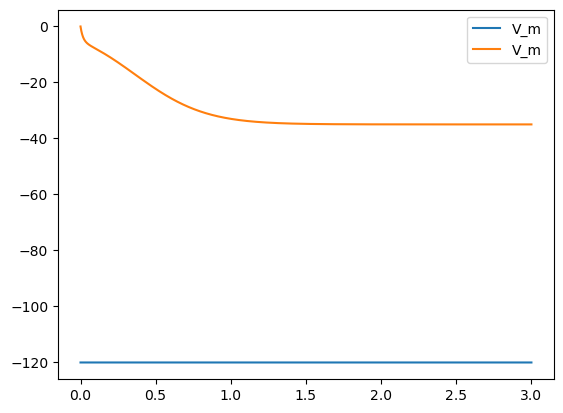

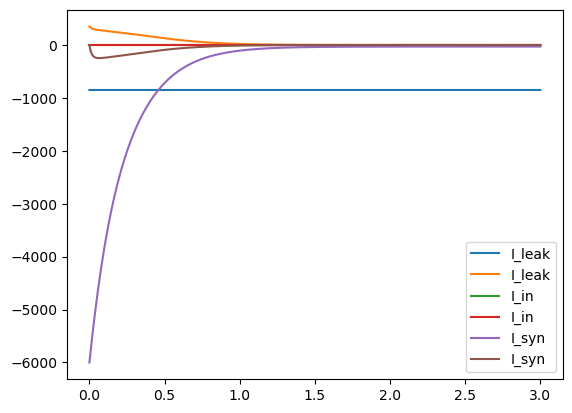

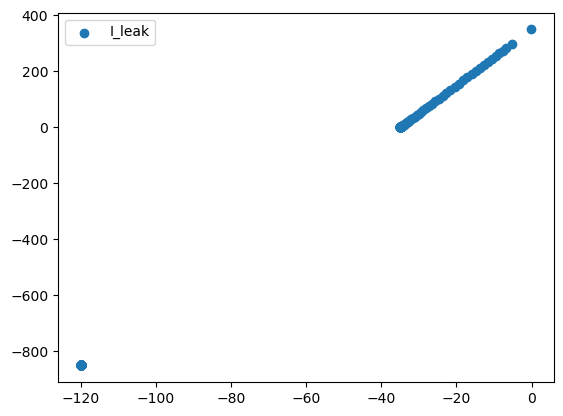

In [38]:
show_data(results)

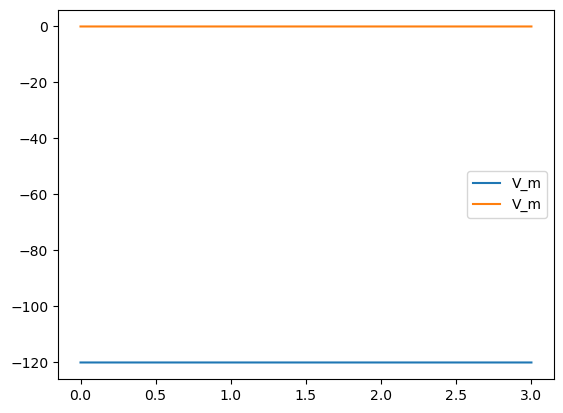

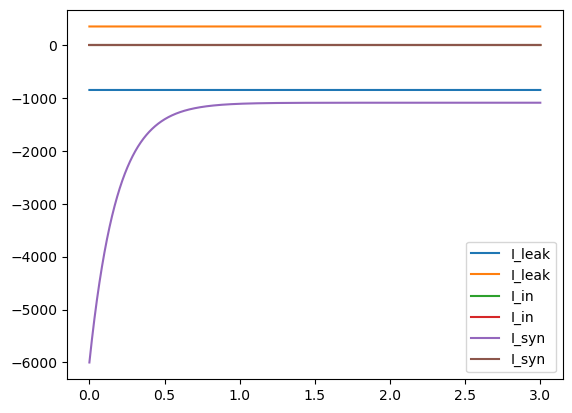

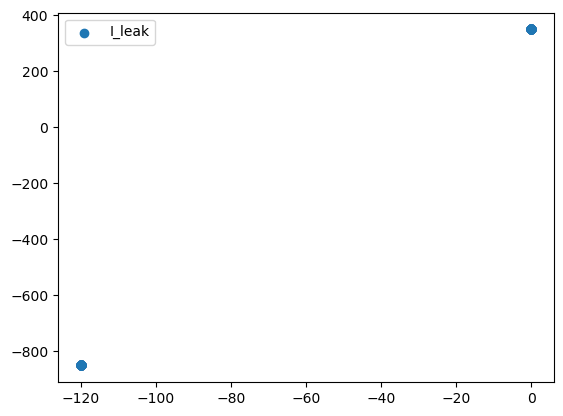

In [34]:
show_data(results)